In [1]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

In [2]:
data = np.load("processes_o_data.npy")

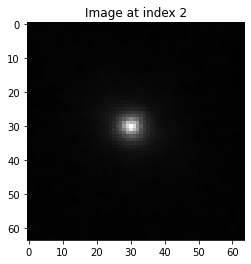

In [3]:
image_array = data
# Choose an index to display a specific image from the array
index_to_display = 2  # Change this index as needed

# Display the image using matplotlib
plt.imshow(image_array[index_to_display], cmap='gray')  # Assuming grayscale, change cmap if necessary
plt.title(f"Image at index {index_to_display}")
plt.show()

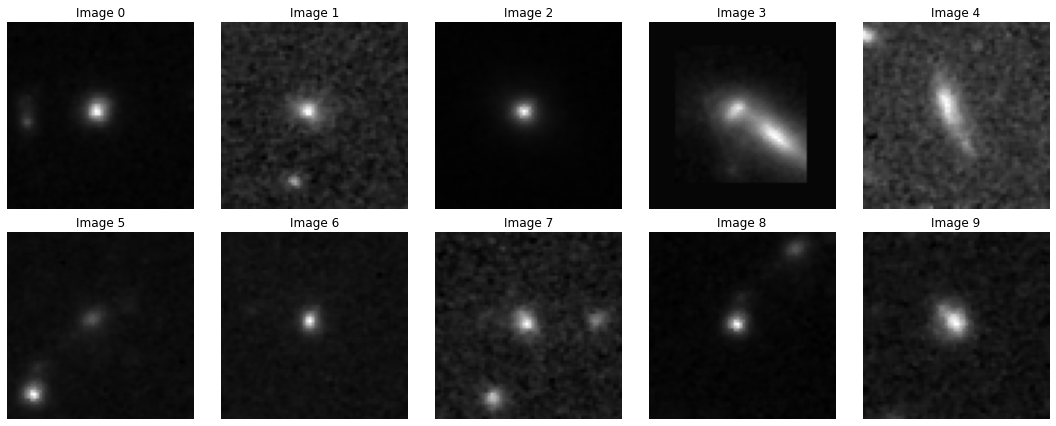

In [4]:
# Number of images to display
num_images_to_display = 10  

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Loop through the images and display them
for i in range(num_images_to_display):
    ax = axes[i // 5, i % 5]  # Determine the position in the grid
    ax.imshow(image_array[i], cmap='gray')  # Assuming grayscale, change cmap if necessary
    ax.set_title(f"Image {i}")
    ax.axis('off')  # Hide axes for a cleaner look

# Adjust the layout and display the images
plt.tight_layout()
plt.show()

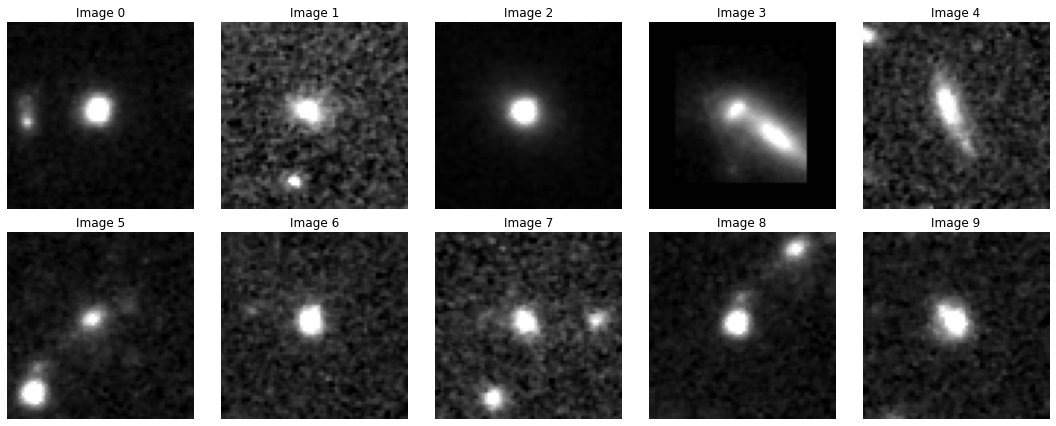

In [5]:
# Assuming image_array is assigned to data
image_array = data  

# Function to normalize and filter individual images
def normalize_image(image):
    normalized_image = deepcopy(image)

    # Apply normalization steps
    low_percentile = np.percentile(normalized_image, 1)
    high_percentile = np.percentile(normalized_image, 99)
    
    # Clip values to the 1st and 99th percentiles
    normalized_image[normalized_image <= low_percentile] = low_percentile
    normalized_image[normalized_image >= high_percentile] = high_percentile

    # Shift the image so that the minimum is 0
    normalized_image -= np.min(normalized_image)

    # Scale the image to the range [0, 1]
    normalized_image /= np.sum(normalized_image)
    normalized_image /= np.max(normalized_image)
    
    return normalized_image

# Function to plot images within the specified index range
def plot_images(start_index, end_index):
    # Apply normalization to each image in the specified range
    normalized_image_array = np.array([normalize_image(image) for image in image_array[start_index:end_index + 1]])

    # Number of images to display
    num_images_to_display = len(normalized_image_array)

    # Create a figure with subplots
    rows = (num_images_to_display + 4) // 5  # Calculate number of rows needed
    fig, axes = plt.subplots(rows, 5, figsize=(15, 6))

    # Loop through the specified indexes and display the corresponding images
    for i in range(num_images_to_display):
        row, col = divmod(i, 5)
        ax = axes[row, col] if rows > 1 else axes[col]  # Handle case when there's only one row
        ax.imshow(normalized_image_array[i], cmap='gray', vmax=1, vmin=0)  # Adjusting vmin and vmax to cover the full range
        ax.set_title(f"Image {i + start_index}")
        ax.axis('off')  # Hide axes for a cleaner look

    # Hide any unused subplots
    for j in range(num_images_to_display, rows * 5):
        row, col = divmod(j, 5)
        if rows > 1:
            fig.delaxes(axes[row, col])
        else:
            fig.delaxes(axes[col])

    # Adjust the layout and display the images
    plt.tight_layout()
    plt.show()

# Example usage: Plot images from index 0 to index 9
start_index = 0
end_index = 9
plot_images(start_index, end_index)


In [6]:
# Apply normalization to the entire dataset
normalized_image_array = np.array([normalize_image(image) for image in image_array])

In [7]:
image_array = normalized_image_array

# Compute statistical details
mean_value = np.mean(image_array)
median_value = np.median(image_array)
std_deviation = np.std(image_array)
min_value = np.min(image_array)
max_value = np.max(image_array)

# Display the results
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Mean: 0.15532142
Median: 0.106451005
Standard Deviation: 0.16547409
Minimum Value: 0.0
Maximum Value: 1.0


In [8]:
# Apply normalization to the entire dataset
normalized_image_array = np.array([normalize_image(image) for image in image_array])

(array([2544.,  357.,  237.,  144.,  126.,  101.,   78.,   65.,   60.,
          29.,   46.,   33.,   26.,   36.,   18.,   32.,   17.,   25.,
          22.,   10.,   13.,   15.,    8.,    6.,   48.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x2b70a182fd0>])

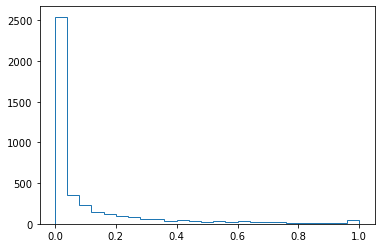

In [9]:
plt.hist(normalized_image_array[3].flat, bins=25, histtype='step')

(array([2314.,  601.,  286.,  194.,  134.,  100.,   75.,   52.,   53.,
          37.,   46.,   31.,   33.,   29.,   20.,   19.,   16.,    8.,
          14.,    6.,    9.,    6.,    4.,    6.,    3.]),
 array([-0.01150917,  0.00724827,  0.0260057 ,  0.04476314,  0.06352057,
         0.08227801,  0.10103544,  0.11979288,  0.13855031,  0.15730774,
         0.17606518,  0.19482261,  0.21358004,  0.23233749,  0.2510949 ,
         0.26985234,  0.28860977,  0.30736724,  0.32612467,  0.3448821 ,
         0.36363953,  0.38239697,  0.4011544 ,  0.41991183,  0.43866926,
         0.4574267 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x2b77e4eb6d0>])

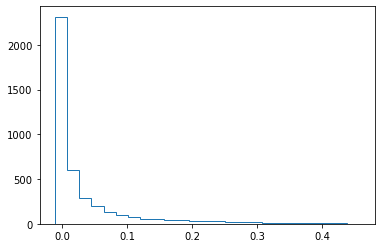

In [10]:
plt.hist(data[3].flat, bins=25, histtype='step')

In [11]:
np.save("norm-o-95.npy",normalized_image_array)

In [12]:
normalized_image_array.shape

(10046, 64, 64)

In [13]:
image_array = normalized_image_array

# Compute statistical details
mean_value = np.mean(image_array)
median_value = np.median(image_array)
std_deviation = np.std(image_array)
min_value = np.min(image_array)
max_value = np.max(image_array)

# Display the results
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Mean: 0.15537843
Median: 0.106494084
Standard Deviation: 0.16552152
Minimum Value: 0.0
Maximum Value: 1.0


In [14]:
image_array = data

# Compute statistical details
mean_value = np.mean(image_array)
median_value = np.median(image_array)
std_deviation = np.std(image_array)
min_value = np.min(image_array)
max_value = np.max(image_array)

# Display the results
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Mean: 0.017256338
Median: 0.0021596886
Standard Deviation: 4.6656127
Minimum Value: -25.719767
Maximum Value: 8369.725


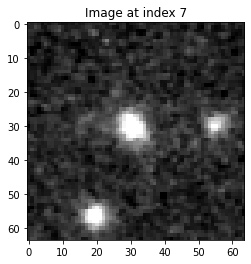

In [15]:
image_array = normalized_image_array
# Choose an index to display a specific image from the array
index_to_display = 7  # Change this index as needed

# Display the image using matplotlib
plt.imshow(image_array[index_to_display], cmap='gray')  # Assuming grayscale, change cmap if necessary
plt.title(f"Image at index {index_to_display}")
plt.show()

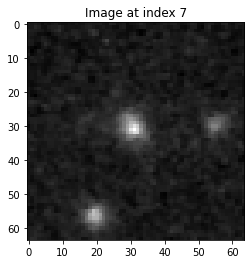

In [16]:
image_array = data
# Choose an index to display a specific image from the array
index_to_display = 7  # Change this index as needed

# Display the image using matplotlib
plt.imshow(image_array[index_to_display], cmap='gray')  # Assuming grayscale, change cmap if necessary
plt.title(f"Image at index {index_to_display}")
plt.show()

(array([122., 187., 402., 552., 689., 662., 552., 362., 196., 112.,  60.,
         40.,  24.,  14.,  21.,   7.,  12.,  10.,   6.,   4.,   8.,   4.,
          2.,   2.,  46.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x2b70a1c7eb0>])

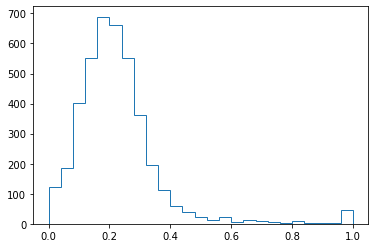

In [17]:
plt.hist(normalized_image_array[1].flat, bins=25, histtype='step')

(array([1.400e+01, 2.810e+02, 1.185e+03, 1.557e+03, 6.970e+02, 1.860e+02,
        5.200e+01, 3.300e+01, 2.100e+01, 1.600e+01, 7.000e+00, 1.000e+01,
        9.000e+00, 3.000e+00, 2.000e+00, 8.000e+00, 1.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        4.000e+00]),
 array([-0.01619711, -0.01141141, -0.00662571, -0.00184001,  0.0029457 ,
         0.0077314 ,  0.0125171 ,  0.0173028 ,  0.0220885 ,  0.0268742 ,
         0.0316599 ,  0.03644561,  0.04123131,  0.04601701,  0.05080271,
         0.05558841,  0.06037411,  0.06515981,  0.06994551,  0.07473122,
         0.07951692,  0.08430262,  0.08908832,  0.09387402,  0.09865972,
         0.10344543], dtype=float32),
 [<matplotlib.patches.Polygon at 0x2b70a187640>])

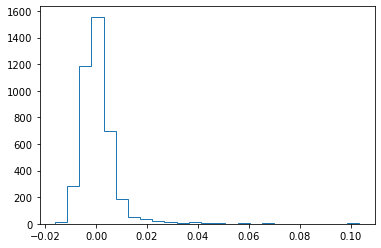

In [18]:
plt.hist(data[1].flat, bins=25, histtype='step')